In [ ]:
'''
pip install pandas_datareader
conda install -c conda-forge fbprophet
conda install libpython m2w64-toolchain -c msys2
pip install yfinance --upgrade --no-cache-dir
'''

# 시계열 데이터

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


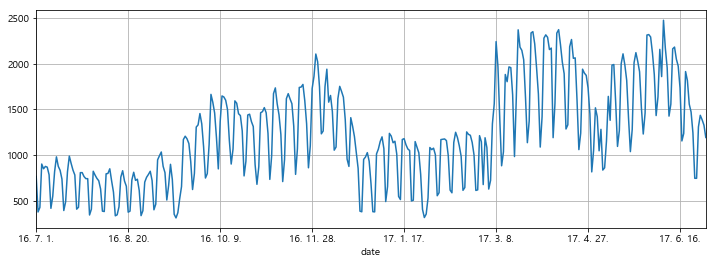

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


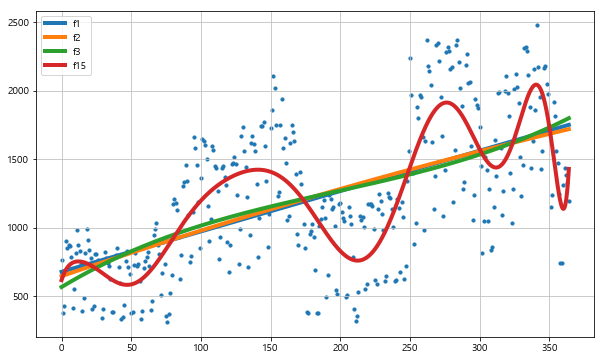

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [9]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,702.505665,1135.818002
421,2017-08-26,496.917939,275.032039,712.357097
422,2017-08-27,629.458439,418.945539,833.314728
423,2017-08-28,1181.938386,971.555971,1388.800383
424,2017-08-29,1217.864960,996.376624,1423.889013


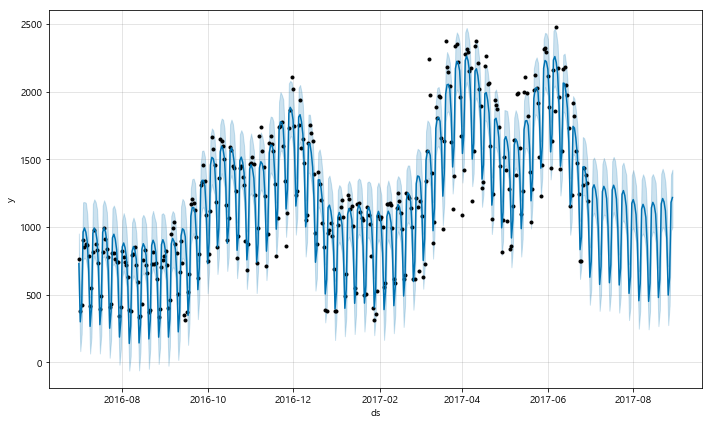

In [24]:
m.plot(forecast);
# print(m)

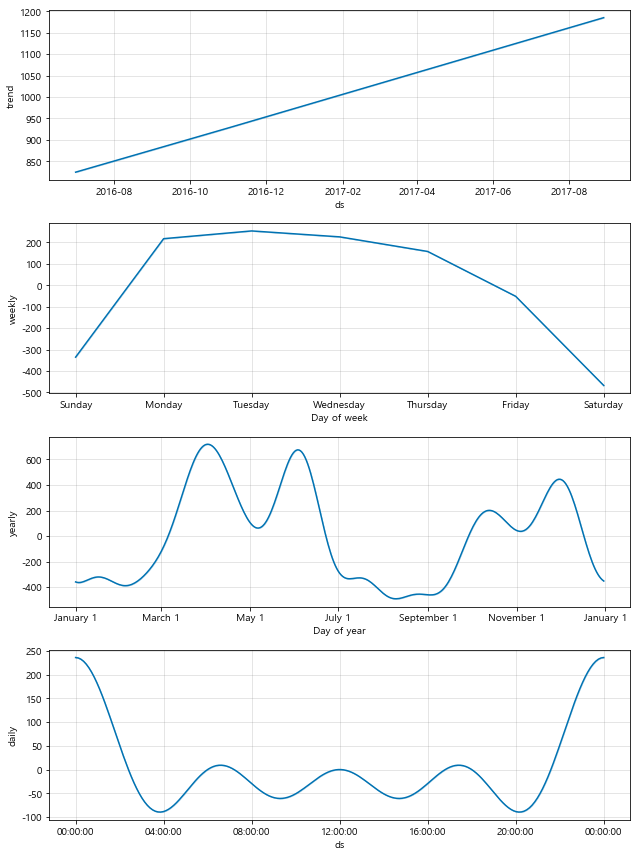

In [13]:
m.plot_components(forecast);

In [15]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.52,7665.24,7300.23,7665.24,5803.05,636300
2000-01-05,7404.52,7404.52,7248.09,7248.09,5487.25,686100
2000-01-06,7331.52,7519.24,6935.22,6935.22,5250.38,379000
2000-01-07,6987.36,7143.80,6778.79,6778.79,5131.96,701400
2000-01-10,6841.36,7102.08,6810.07,7091.65,5368.81,1076700


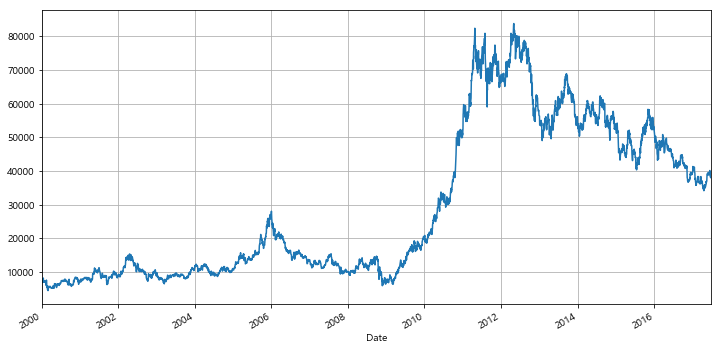

In [16]:

KIA['Close'].plot(figsize=(12,6), grid=True);

In [17]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.52,7665.24,7300.23,7665.24,5803.05,636300
2000-01-05,7404.52,7404.52,7248.09,7248.09,5487.25,686100
2000-01-06,7331.52,7519.24,6935.22,6935.22,5250.38,379000
2000-01-07,6987.36,7143.80,6778.79,6778.79,5131.96,701400
2000-01-10,6841.36,7102.08,6810.07,7091.65,5368.81,1076700
2000-01-11,7143.80,7717.39,7143.80,7717.39,5842.54,1127200
2000-01-12,7717.39,8447.41,7300.23,7508.81,5684.63,1606600
2000-01-13,7696.53,7696.53,7195.94,7195.94,5447.77,702700
2000-01-14,7195.94,7508.81,6987.36,7508.81,5684.63,843900


In [18]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.24
1,2000-01-05,7248.09
2,2000-01-06,6935.22
3,2000-01-07,6778.79
4,2000-01-10,7091.65


In [19]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35769.020846,27155.229852,44108.800749
4579,2017-12-26,35814.221686,26874.218427,43986.099506
4580,2017-12-27,35782.801860,26488.008142,44773.531233
4581,2017-12-28,35747.909326,26813.865912,43834.158151
4582,2017-12-29,35685.326302,26773.266391,44436.477821


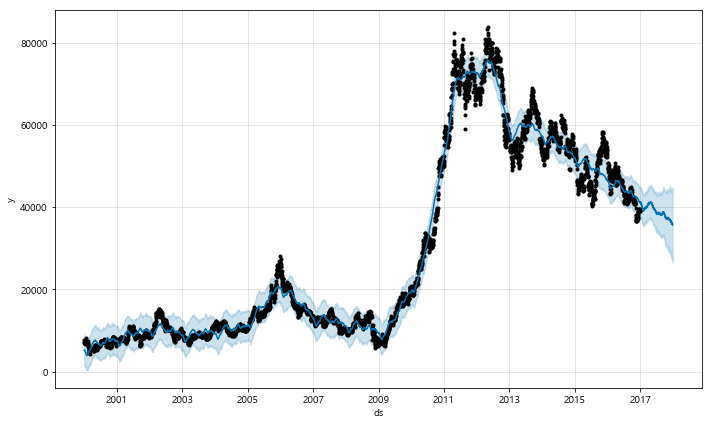

In [22]:
m.plot(forecast);

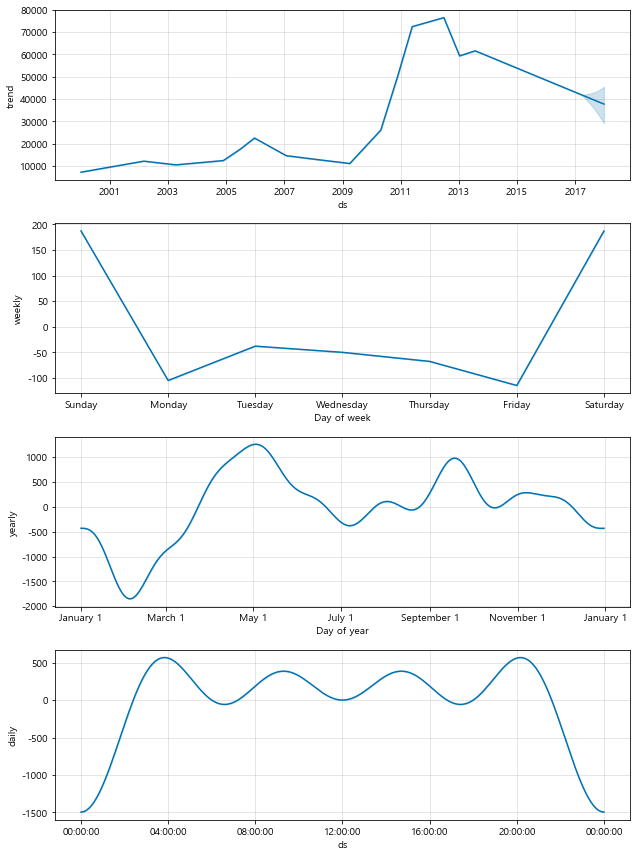

In [23]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


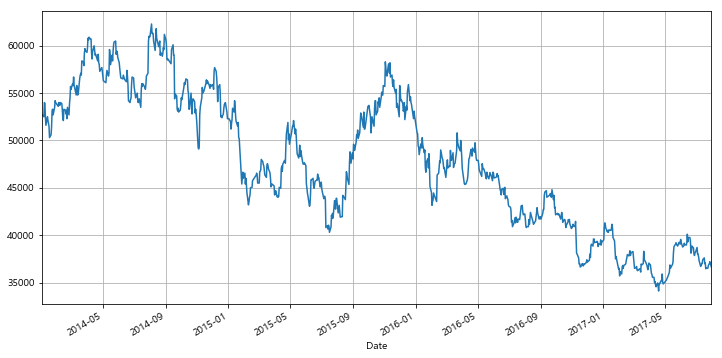

In [24]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

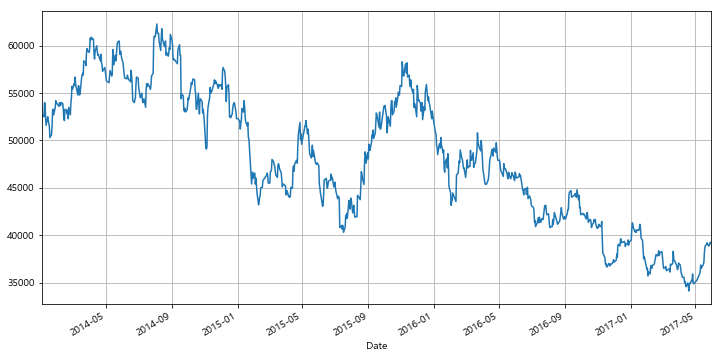

In [25]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [26]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [27]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [28]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


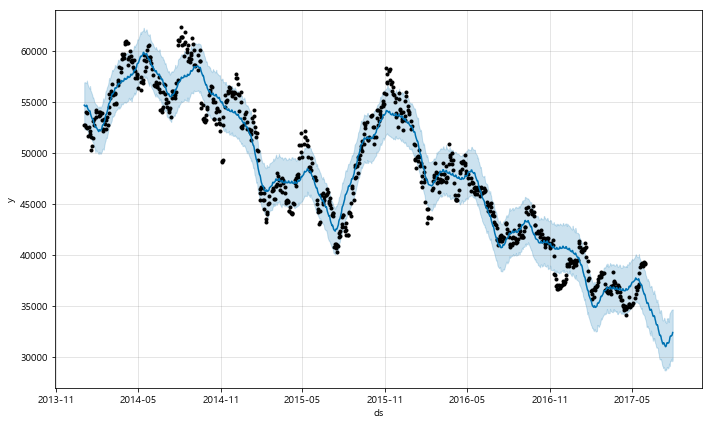

In [29]:
forecast = m.predict(future)
m.plot(forecast);

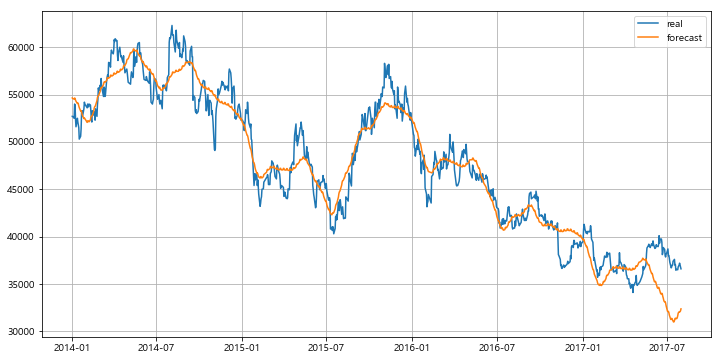

In [30]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [31]:

df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [32]:
df['cap'] = 8.5

In [33]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

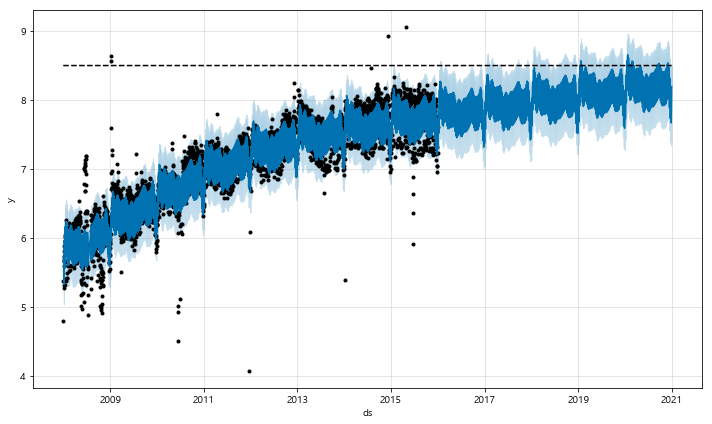

In [34]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

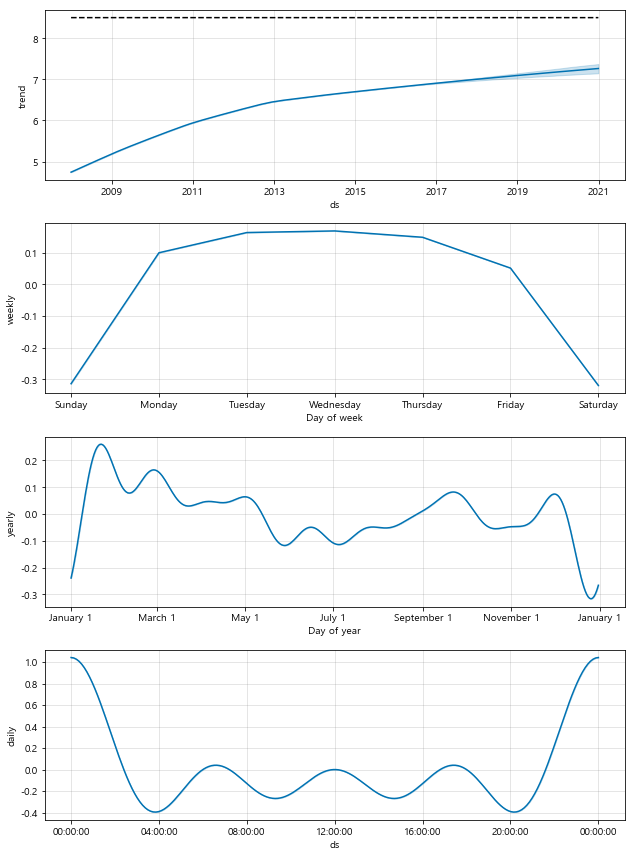

In [35]:
forecast = m.predict(future)
m.plot_components(forecast);

In [36]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

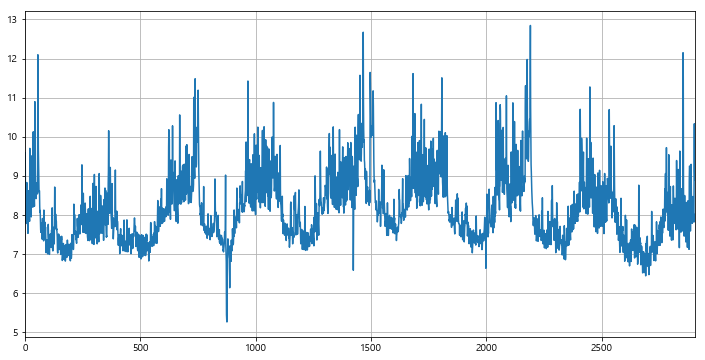

In [37]:
df.y.plot(figsize=(12,6), grid=True);

In [38]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [39]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [40]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224116,1.203719
2191,2014-02-03,1.902824,1.458890
2532,2015-01-11,1.224116,0.000000
2533,2015-01-12,1.902824,0.000000
2901,2016-01-17,1.224116,0.000000
2902,2016-01-18,1.902824,0.000000
2908,2016-01-24,1.224116,0.000000
2909,2016-01-25,1.902824,0.000000
2922,2016-02-07,1.224116,1.203719
2923,2016-02-08,1.902824,1.458890


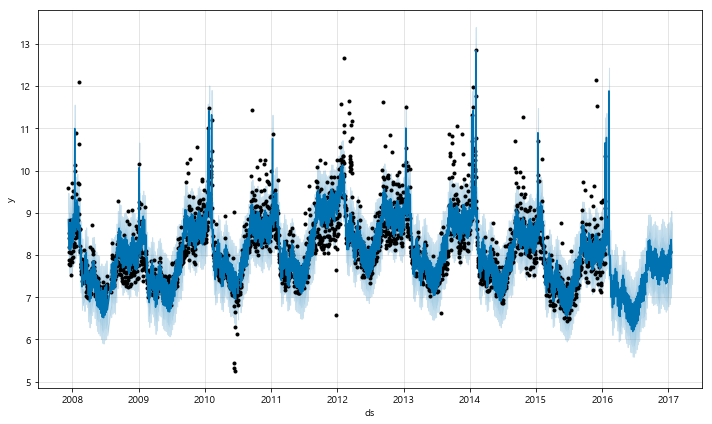

In [41]:
m.plot(forecast);

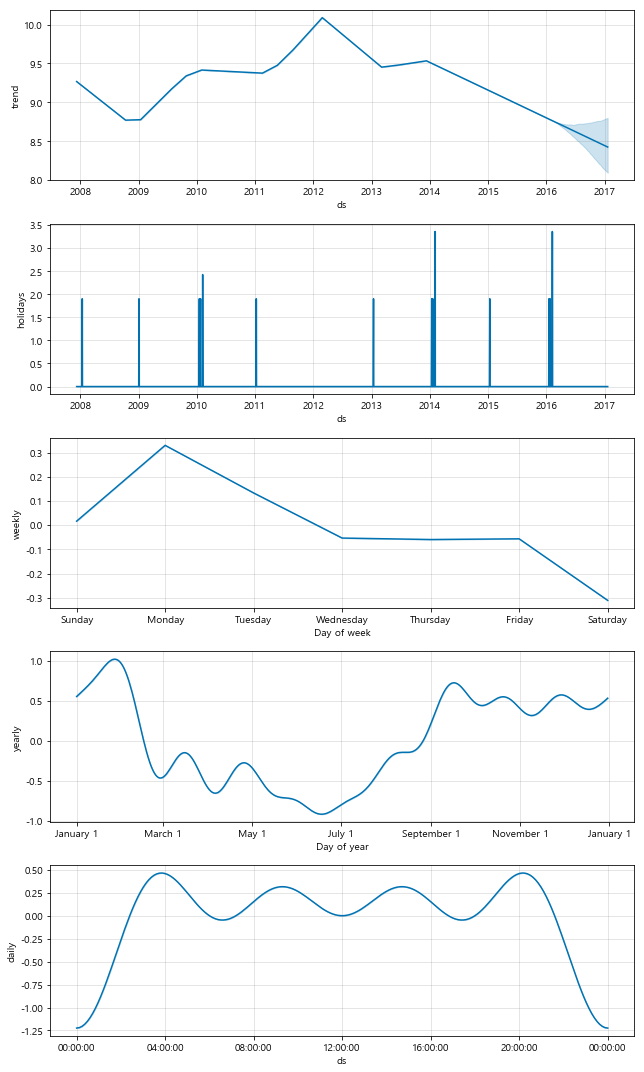

In [42]:
m.plot_components(forecast);